In [1]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
import h5py
import kerastuner as kt

Using TensorFlow backend.


In [2]:
# (img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()
# 
# 
N_channels = 40
file_path = '/Users/jackkelly/Desktop/Building_Model/Data/40_channels_data_blocks_20000.csv'
df = pd.read_csv(file_path)
# dataset
dataset = df.values
# input power and channels statuses
X = dataset[:,0:N_channels+1]
# channel SNRs
Y = dataset[:,N_channels+1:2*N_channels+1]
# shuffle necessary because while shuffle=True in .fit() shuffles the data, it splits into different datasets first
X, Y = shuffle(X, Y)
# scaling between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y)
# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)
# X_train, X_val, Y_train, Y_val = train_test_split(X_scale, Y_scale, test_size=0.2)

In [3]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=N_channels+1))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
#     hp_units1 = hp.Int('units1', min_value=10, max_value=300, step=2)
#     hp_units2 = hp.Int('units2', min_value=10, max_value=300, step=2)
#     model.add(keras.layers.Dense(units=hp_units1, activation='relu'))
#     model.add(keras.layers.Dense(units=hp_units2, activation='relu'))
#     model.add(keras.layers.Dense(N_channels, activation='sigmoid'))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(keras.layers.Dense(hp.Int(f'hidden_{i}_units', min_value=32, max_value=320, step=1)))
    model.add(keras.layers.Dense(N_channels, activation='sigmoid'))
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.MeanSquaredError(), metrics=['mean_squared_error'])

    return model

In [4]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective('mean_squared_error', 'min'),
                     max_epochs=10,
                     factor=3,
                     directory='/Users/jackkelly/Desktop/Building_Model/',
                     project_name='intro_to_kt_layers',
                     overwrite=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [5]:
tuner.search(X_scale, Y_scale, epochs=50, validation_split=0.25, callbacks=[stop_early], verbose=2)

Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 3s - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 2/2
15000/15000 - 1s - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0302 - val_mean_squared_error: 0.0302


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 2s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 3.9904e-04 - val_mean_squared_error: 3.9904e-04
Epoch 2/2
15000/15000 - 1s - loss: 5.6593e-04 - mean_squared_error: 5.6593e-04 - val_loss: 6.3856e-04 - val_mean_squared_error: 6.3856e-04


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 3s - loss: 0.1264 - mean_squared_error: 0.1264 - val_loss: 0.0753 - val_mean_squared_error: 0.0753
Epoch 2/2
15000/15000 - 2s - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.0352 - val_mean_squared_error: 0.0352


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 2s - loss: 0.1480 - mean_squared_error: 0.1480 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 2/2
15000/15000 - 2s - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0550 - val_mean_squared_error: 0.0550


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 2s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2/2
15000/15000 - 2s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0040 - val_mean_squared_error: 0.0040


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 2s - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2/2
15000/15000 - 2s - loss: 8.2115e-04 - mean_squared_error: 8.2115e-04 - val_loss: 4.8285e-04 - val_mean_squared_error: 4.8285e-04


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 2s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 2/2
15000/15000 - 2s - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.2460 - val_mean_squared_error: 0.2460


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 2s - loss: 0.1630 - mean_squared_error: 0.1630 - val_loss: 0.1301 - val_mean_squared_error: 0.1301
Epoch 2/2
15000/15000 - 1s - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.0751 - val_mean_squared_error: 0.0751


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 2s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2/2
15000/15000 - 2s - loss: 8.1660e-04 - mean_squared_error: 8.1660e-04 - val_loss: 5.5394e-04 - val_mean_squared_error: 5.5394e-04


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 3s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2/2
15000/15000 - 2s - loss: 0.2934 - mean_squared_error: 0.2934 - val_loss: 0.4081 - val_mean_squared_error: 0.4081


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 3s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 2/2
15000/15000 - 3s - loss: 0.3717 - mean_squared_error: 0.3717 - val_loss: 0.4059 - val_mean_squared_error: 0.4059


Train on 15000 samples, validate on 5000 samples
Epoch 1/2
15000/15000 - 3s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2/2
15000/15000 - 2s - loss: 5.7855e-04 - mean_squared_error: 5.7855e-04 - val_loss: 4.1361e-04 - val_mean_squared_error: 4.1361e-04


Train on 15000 samples, validate on 5000 samples
Epoch 3/4
15000/15000 - 3s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 5.0739e-04 - val_mean_squared_error: 5.0739e-04
Epoch 4/4
15000/15000 - 1s - loss: 6.3637e-04 - mean_squared_error: 6.3637e-04 - val_loss: 4.9682e-04 - val_mean_squared_error: 4.9682e-04


Train on 15000 samples, validate on 5000 samples
Epoch 3/4
15000/15000 - 2s - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 5.8063e-04 - val_mean_squared_error: 5.8063e-04
Epoch 4/4
15000/15000 - 1s - loss: 5.2322e-04 - mean_squared_error: 5.2322e-04 - val_loss: 5.9363e-04 - val_mean_squared_error: 5.9363e-04


Train on 15000 samples, validate on 5000 samples
Epoch 3/4
15000/15000 - 2s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 4/4
15000/15000 - 1s - loss: 7.4777e-04 - mean_squared_error: 7.4777e-04 - val_loss: 6.9108e-04 - val_mean_squared_error: 6.9108e-04


Train on 15000 samples, validate on 5000 samples
Epoch 3/4
15000/15000 - 3s - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/4
15000/15000 - 2s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 4.5109e-04 - val_mean_squared_error: 4.5109e-04


Train on 15000 samples, validate on 5000 samples
Epoch 5/10
15000/15000 - 2s - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 9.8034e-04 - val_mean_squared_error: 9.8034e-04
Epoch 6/10
15000/15000 - 1s - loss: 6.0899e-04 - mean_squared_error: 6.0899e-04 - val_loss: 3.6758e-04 - val_mean_squared_error: 3.6758e-04
Epoch 7/10
15000/15000 - 1s - loss: 5.2751e-04 - mean_squared_error: 5.2751e-04 - val_loss: 3.9861e-04 - val_mean_squared_error: 3.9861e-04
Epoch 8/10
15000/15000 - 1s - loss: 5.1830e-04 - mean_squared_error: 5.1830e-04 - val_loss: 7.1513e-04 - val_mean_squared_error: 7.1513e-04
Epoch 9/10
15000/15000 - 1s - loss: 6.1913e-04 - mean_squared_error: 6.1913e-04 - val_loss: 8.2864e-04 - val_mean_squared_error: 8.2864e-04
Epoch 10/10
15000/15000 - 1s - loss: 6.3431e-04 - mean_squared_error: 6.3431e-04 - val_loss: 6.6596e-04 - val_mean_squared_error: 6.6596e-04


Train on 15000 samples, validate on 5000 samples
Epoch 5/10
15000/15000 - 2s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 4.6806e-04 - val_mean_squared_error: 4.6806e-04
Epoch 6/10
15000/15000 - 1s - loss: 7.8576e-04 - mean_squared_error: 7.8576e-04 - val_loss: 5.5790e-04 - val_mean_squared_error: 5.5790e-04
Epoch 7/10
15000/15000 - 1s - loss: 5.6659e-04 - mean_squared_error: 5.6659e-04 - val_loss: 5.8333e-04 - val_mean_squared_error: 5.8333e-04
Epoch 8/10
15000/15000 - 1s - loss: 6.7865e-04 - mean_squared_error: 6.7865e-04 - val_loss: 7.8502e-04 - val_mean_squared_error: 7.8502e-04
Epoch 9/10
15000/15000 - 1s - loss: 9.2326e-04 - mean_squared_error: 9.2326e-04 - val_loss: 7.0033e-04 - val_mean_squared_error: 7.0033e-04
Epoch 10/10
15000/15000 - 1s - loss: 8.3375e-04 - mean_squared_error: 8.3375e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011


Train on 15000 samples, validate on 5000 samples
Epoch 1/4
15000/15000 - 2s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 9.9389e-04 - val_mean_squared_error: 9.9389e-04
Epoch 2/4
15000/15000 - 1s - loss: 7.4220e-04 - mean_squared_error: 7.4220e-04 - val_loss: 4.6039e-04 - val_mean_squared_error: 4.6039e-04
Epoch 3/4
15000/15000 - 1s - loss: 7.6461e-04 - mean_squared_error: 7.6461e-04 - val_loss: 9.3684e-04 - val_mean_squared_error: 9.3684e-04
Epoch 4/4
15000/15000 - 1s - loss: 9.3186e-04 - mean_squared_error: 9.3186e-04 - val_loss: 9.0467e-04 - val_mean_squared_error: 9.0467e-04


Train on 15000 samples, validate on 5000 samples
Epoch 1/4
15000/15000 - 2s - loss: 0.1334 - mean_squared_error: 0.1334 - val_loss: 0.0787 - val_mean_squared_error: 0.0787
Epoch 2/4
15000/15000 - 2s - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 3/4
15000/15000 - 2s - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 4/4
15000/15000 - 2s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0043 - val_mean_squared_error: 0.0043


Train on 15000 samples, validate on 5000 samples
Epoch 1/4
15000/15000 - 3s - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 2/4
15000/15000 - 2s - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 3/4
15000/15000 - 3s - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 4/4
15000/15000 - 2s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Train on 15000 samples, validate on 5000 samples
Epoch 1/4
15000/15000 - 2s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2/4
15000/15000 - 2s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 3/4
15000/15000 - 2s - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0723 - val_mean_squared_error: 0.0723
Epoch 4/4
15000/15000 - 2s - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Train on 15000 samples, validate on 5000 samples
Epoch 1/4
15000/15000 - 3s - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 2/4
15000/15000 - 2s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 3/4
15000/15000 - 2s - loss: 7.3772e-04 - mean_squared_error: 7.3772e-04 - val_loss: 4.2289e-04 - val_mean_squared_error: 4.2289e-04
Epoch 4/4
15000/15000 - 2s - loss: 3.8574e-04 - mean_squared_error: 3.8574e-04 - val_loss: 3.4999e-04 - val_mean_squared_error: 3.4999e-04


Train on 15000 samples, validate on 5000 samples
Epoch 1/4
15000/15000 - 3s - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 2/4
15000/15000 - 2s - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3/4
15000/15000 - 2s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 4/4
15000/15000 - 2s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 7.3063e-04 - val_mean_squared_error: 7.3063e-04


Train on 15000 samples, validate on 5000 samples
Epoch 5/10
15000/15000 - 2s - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 6/10
15000/15000 - 2s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 5.4231e-04 - val_mean_squared_error: 5.4231e-04
Epoch 7/10
15000/15000 - 2s - loss: 4.1196e-04 - mean_squared_error: 4.1196e-04 - val_loss: 3.9855e-04 - val_mean_squared_error: 3.9855e-04
Epoch 8/10
15000/15000 - 2s - loss: 3.7569e-04 - mean_squared_error: 3.7569e-04 - val_loss: 3.5225e-04 - val_mean_squared_error: 3.5225e-04
Epoch 9/10
15000/15000 - 2s - loss: 4.0254e-04 - mean_squared_error: 4.0254e-04 - val_loss: 3.4937e-04 - val_mean_squared_error: 3.4937e-04
Epoch 10/10
15000/15000 - 2s - loss: 3.8270e-04 - mean_squared_error: 3.8270e-04 - val_loss: 3.6538e-04 - val_mean_squared_error: 3.6538e-04


Train on 15000 samples, validate on 5000 samples
Epoch 5/10
15000/15000 - 2s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 4.9054e-04 - val_mean_squared_error: 4.9054e-04
Epoch 6/10
15000/15000 - 2s - loss: 7.7972e-04 - mean_squared_error: 7.7972e-04 - val_loss: 4.6824e-04 - val_mean_squared_error: 4.6824e-04
Epoch 7/10
15000/15000 - 2s - loss: 7.7881e-04 - mean_squared_error: 7.7881e-04 - val_loss: 7.9466e-04 - val_mean_squared_error: 7.9466e-04
Epoch 8/10
15000/15000 - 2s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 9/10
15000/15000 - 2s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 10/10
15000/15000 - 1s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 - 3s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2/10
15000/15000 - 2s - loss: 0.3037 - mean_squared_error: 0.3037 - val_loss: 0.4031 - val_mean_squared_error: 0.4031
Epoch 3/10
15000/15000 - 2s - loss: 0.3979 - mean_squared_error: 0.3979 - val_loss: 0.3977 - val_mean_squared_error: 0.3977
Epoch 4/10
15000/15000 - 2s - loss: 0.3979 - mean_squared_error: 0.3979 - val_loss: 0.3991 - val_mean_squared_error: 0.3991
Epoch 5/10
15000/15000 - 2s - loss: 0.3978 - mean_squared_error: 0.3978 - val_loss: 0.3968 - val_mean_squared_error: 0.3968
Epoch 6/10
15000/15000 - 3s - loss: 0.4076 - mean_squared_error: 0.4076 - val_loss: 0.4063 - val_mean_squared_error: 0.4063


Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 - 3s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 4.1945e-04 - val_mean_squared_error: 4.1945e-04
Epoch 2/10
15000/15000 - 2s - loss: 5.0757e-04 - mean_squared_error: 5.0757e-04 - val_loss: 6.8395e-04 - val_mean_squared_error: 6.8395e-04
Epoch 3/10
15000/15000 - 2s - loss: 5.2845e-04 - mean_squared_error: 5.2845e-04 - val_loss: 4.3589e-04 - val_mean_squared_error: 4.3589e-04
Epoch 4/10
15000/15000 - 2s - loss: 5.0480e-04 - mean_squared_error: 5.0480e-04 - val_loss: 4.8333e-04 - val_mean_squared_error: 4.8333e-04
Epoch 5/10
15000/15000 - 2s - loss: 5.2204e-04 - mean_squared_error: 5.2204e-04 - val_loss: 4.5921e-04 - val_mean_squared_error: 4.5921e-04
Epoch 6/10
15000/15000 - 2s - loss: 5.6992e-04 - mean_squared_error: 5.6992e-04 - val_loss: 6.9418e-04 - val_mean_squared_error: 6.9418e-04


Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 - 2s - loss: 0.1390 - mean_squared_error: 0.1390 - val_loss: 0.0890 - val_mean_squared_error: 0.0890
Epoch 2/10
15000/15000 - 2s - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 3/10
15000/15000 - 2s - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 4/10
15000/15000 - 2s - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 5/10
15000/15000 - 2s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6/10
15000/15000 - 2s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 7/10
15000/15000 - 2s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 9.8816e-04 - val_mean_squared_error: 9.8816e-04
Epoch 8/10
15000/15000 - 2s - loss: 8.2236e-04 - mean_squared_error: 8.2236

Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 - 2s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 6.6513e-04 - val_mean_squared_error: 6.6513e-04
Epoch 2/10
15000/15000 - 2s - loss: 9.4727e-04 - mean_squared_error: 9.4727e-04 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 3/10
15000/15000 - 2s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 4/10
15000/15000 - 2s - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0665 - val_mean_squared_error: 0.0665
Epoch 5/10
15000/15000 - 1s - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 6/10
15000/15000 - 2s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0103 - val_mean_squared_error: 0.0103


INFO:tensorflow:Oracle triggered exit


In [6]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [7]:
# Build the model with the optimal hyperparameters and train it on the data for 25 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_scale, Y_scale, epochs=25, validation_split=0.25, verbose=0)

mean_squared_error_per_epoch = history.history['mean_squared_error']
best_epoch = mean_squared_error_per_epoch.index(min(mean_squared_error_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 6


In [8]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_scale, Y_scale, epochs=best_epoch, validation_split=0.25, verbose=0)

In [9]:
file_path = '/Users/jackkelly/Desktop/Building_Model/Data/40_channels_data_10000.csv'
df = pd.read_csv(file_path)
# dataset
dataset = df.values
# input power and channels statuses
X = dataset[:,0:N_channels+1]
# channel SNRs
Y = dataset[:,N_channels+1:2*N_channels+1]
# shuffle necessary because while shuffle=True in .fit() shuffles the data, it splits into different datasets first
X, Y = shuffle(X, Y)
# scaling between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_test = min_max_scaler.fit_transform(X)
Y_test = min_max_scaler.fit_transform(Y)

In [10]:
eval_result = hypermodel.evaluate(X_test, Y_test)
print(eval_result)
# print("[test loss, test accuracy]:", eval_result)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 0s 44us/sample - loss: 3.6467e-04 - mean_squared_error: 3.8460e-04
[0.0003845994759351015, 0.0003845994]


In [11]:
# for key, value in history.history.items():
#     print(key)

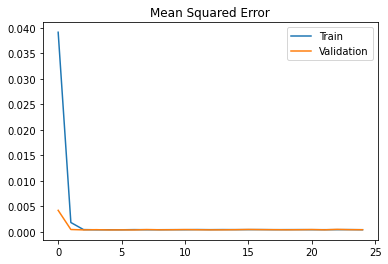

In [12]:
def visualising_data(hist):
    plt.title('Mean Squared Error')
    plt.plot(history.history['mean_squared_error'], label='Train')
    plt.plot(history.history['val_mean_squared_error'], label='Validation')
    plt.legend()
    plt.show()
visualising_data(history)

In [13]:
# shows weights of the ANN
# hypermodel.weights
hypermodel.summary()
# print(hypermodel.metrics_names)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 53)                2226      
_________________________________________________________________
dense_1 (Dense)              (None, 67)                3618      
_________________________________________________________________
dense_2 (Dense)              (None, 178)               12104     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                7160      
Total params: 25,108
Trainable params: 25,108
Non-trainable params: 0
_________________________________________________________________


In [14]:
best_hps.__dict__.keys()
best_hps.__dict__['values']

{'n_layers': 3,
 'conv_0_units': 53,
 'learning_rate': 0.001,
 'conv_1_units': 67,
 'conv_2_units': 178,
 'conv_3_units': 315,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '11fa5922ad0a7a777876e1e906c72ade'}